## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in **shortlisting the candidates having higher chances of VISA approval**. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# cross validation
from sklearn.model_selection import cross_val_score, KFold

# oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

#warnings
import warnings
warnings.filterwarnings('ignore')  


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

## Import Dataset

In [2]:
# Load the dataset
data = pd.read_csv('EasyVisa.csv')

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [3]:
print("First 5 rows of the dataset:")
print(data.head(5))
print ("\n\n")

print("Last 5 rows of the dataset:")
print(data.tail(5))


First 5 rows of the dataset:
  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y  

#### Understand the shape of the dataset

In [4]:
print (data.info())
print("Shape of the dataset,  total rows {0} and columns {1} ".format(data.shape[0], data.shape[1]))  # (rows, columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None
Shape of the dataset,  total rows 25480 and columns 12 


#### Check the data types of the columns for the dataset

In [5]:
# Data sanity checks 

# Check for categorical and numerical variables and count of null values in each column

print ("\nData types and null values in each column:\n")  
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Column: {col} is a categorical variable, and there are {data[col].isnull().sum()} null values.\n")
        print(f"Unique values in {col}: {data[col].unique()}\n")
    elif data[col].dtype in ['int64', 'float64']:
        print(f"Column: {col} is a numerical variable, and there are {data[col].isnull().sum()} null values.\n")

print ("\n")

# Check for duplicate rows
print("\nChecking for duplicate rows in the dataset:")
duplicate_rows = data.duplicated()
num_duplicate_rows = duplicate_rows.sum()
#print(f"Number of duplicate rows: {num_duplicate_rows}")
if num_duplicate_rows > 0:
    print("Duplicate rows found:")
    print(data[duplicate_rows])
    print("Removing duplicate rows.")
    data = data.drop_duplicates()
    print(f"New shape of the dataset after removing duplicates: {data.shape}")  
else:
    print("No duplicate rows found.")   

print ("\n")





Data types and null values in each column:

Column: case_id is a categorical variable, and there are 0 null values.

Unique values in case_id: ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']

Column: continent is a categorical variable, and there are 0 null values.

Unique values in continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']

Column: education_of_employee is a categorical variable, and there are 0 null values.

Unique values in education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']

Column: has_job_experience is a categorical variable, and there are 0 null values.

Unique values in has_job_experience: ['N' 'Y']

Column: requires_job_training is a categorical variable, and there are 0 null values.

Unique values in requires_job_training: ['N' 'Y']

Column: no_of_employees is a numerical variable, and there are 0 null values.

Column: yr_of_estab is a numerical variable, and there are 0 null values.

Column: r

**Observations after sanity checks**
 - There are 3 numerical columns and the rest as 'Object' data types
 -  Total rows 25480 and columns 12
 - There are NO duplicate rows
 - There are NO NULL values in any of the columns 
---

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [6]:
data.describe(include='all').T  # statistical summary of numerical columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Sanity Check - Observations**
- case_id -->  count and unique are the same which indicates that its a identifier or ID, this column can be removed as it's not useful for analysis
- continent --> There are 6 unique values, shows where the applicats are from 
- education_of_employee --> There are 4 unique values
- has_job_experience --> data is aplit almost evenly 
- requires_job_training --> most applicants dont need job training
- no_of_employees --> min value is a negative value, there cannot be less than 0 employees in a company, this indicates that there are some bad data with less than 0 employees, the bad data needs to be removed
- yr_of_estab --> min value is 1800, there are applicants for companies older than 200 years 
- region_of_employment --> 5 unique regions 
- prevailing_wage --> comparing 25% and max , the data appears have a wide spread
- unit_of_wage --> 4 unique values
- full_time_position --> full time job is more preferred 
- case_status --> This is the dependent variable, applicants certifies is slight more



#### Fixing the negative values in number of employees columns

In [7]:
#count number row with numberical column value less than 0 
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        if (data[col].min() < 0):
            num_negative_values = (data[col] < 0).sum()
            print(f"Column: {col} has {num_negative_values} negative values.")
        else:
            print(f"Column: {col} has no negative values.")


# "no_of_employees" has negative values, busines cannot have negative employees, and these rows will be removed
data_cleaned = data[data['no_of_employees'] >= 0]
print(f"Shape of the dataset after removing rows with negative 'no_of_employees': {data_cleaned.shape}\n")
print("# statistical summary of numerical columns after cleaning ")
print(data_cleaned.describe().T)  # statistical summary of numerical columns after cleaning 


Column: no_of_employees has 33 negative values.
Column: yr_of_estab has no negative values.
Column: prevailing_wage has no negative values.
Shape of the dataset after removing rows with negative 'no_of_employees': (25447, 12)

# statistical summary of numerical columns after cleaning 
                   count          mean           std        min       25%  \
no_of_employees  25447.0   5674.415334  22891.842245    12.0000   1025.00   
yr_of_estab      25447.0   1979.394506     42.385932  1800.0000   1976.00   
prevailing_wage  25447.0  74468.281479  52822.177370     2.1367  34039.21   

                     50%         75%        max  
no_of_employees   2112.0    3506.500  602069.00  
yr_of_estab       1997.0    2005.000    2016.00  
prevailing_wage  70312.5  107739.505  319210.27  


**Fix Negative Vaules**
- reviewed the numerical columns no_of_employees ,yr_of_estab ,prevailing_wage 
- no_of_employees has 33 negative values, a company does not have negative employees and it's considered bad data, the rows with negative employees has been removed
- after removing 33 rows, there are 25447 rows

#### Let's check the count of each unique category in each of the categorical variables

In [8]:
print("**Unique values and value counts displayed for all categorical columns**\n" \
      "There are NO inconsistent Labels." 
)

#unique values in categorical columns
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        print(f"- {col}: Unique values {data_cleaned[col].unique()}")
        print(f"- {col}: Value counts {data_cleaned[col].value_counts()}\n")



**Unique values and value counts displayed for all categorical columns**
There are NO inconsistent Labels.
- case_id: Unique values ['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
- case_id: Value counts case_id
EZYV01       1
EZYV16994    1
EZYV16992    1
EZYV16991    1
EZYV16990    1
            ..
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV8488     1
EZYV25480    1
Name: count, Length: 25447, dtype: int64

- continent: Unique values ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
- continent: Value counts continent
Asia             16840
Europe            3727
North America     3287
South America      851
Africa             550
Oceania            192
Name: count, dtype: int64

- education_of_employee: Unique values ['High School' "Master's" "Bachelor's" 'Doctorate']
- education_of_employee: Value counts education_of_employee
Bachelor's     10220
Master's        9622
High School     3416
Doctorate       2189
Name: count, dtype: int64

-

### Univariate Analysis

In [9]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# started with this code and it was harder to read the output, left the code here to illustrate looping was attempted 
# for col in data_cleaned.columns:
#     if data_cleaned[col].dtype in ['int64', 'float64']:
#         print(f"Distribution of numerical column: {col}")
#         histogram_boxplot(data_cleaned, col, kde=True, bins=30)
#         plt.show()  


#started with this code and Markdown was much easier to read, so left the code here for reference

# print("# Univariate Analysis of Numerical Columns - observations" \
#       "\n1. 'no_of_employees' has a few negative values which have been removed earlier." \
#       "  \n   - There some outliers on the higher side, indicating some companies have a very high number of employees." \
#       "\n2. 'year_founded' has some outliers on the lower side (left skewed), indicating some companies have existed for over a century." \
#       "  \n   - There are high number of companies founded in the last 75 years." \
#       "\n3. 'prevailing_wage' has few high wages which makes the data right skewed." \
#         "\n   - Most of the wages are concentrated between 0 and 150000." \

# )


# Univariate Analysis of Numerical Columns - observations
1. 'no_of_employees' has a few negative values which have been removed earlier.  
   - There some outliers on the higher side, indicating some companies have a very high number of employees.
2. 'year_founded' has some outliers on the lower side (left skewed), indicating some companies have existed for over a century.  
   - There are high number of companies founded in the last 75 years.
3. 'prevailing_wage' has few high wages which makes the data right skewed.
   - Most of the wages are concentrated between 0 and 150000.

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
        order = data[feature].value_counts().index
    else:
        plt.figure(figsize=(n + 1, 5))
        order = data[feature].value_counts().index[:n]

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=order,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# started with this code and it was harder to read the output, left the code here to illustrate looping was attempted 

# # Barplots for categorical columns
# for col in data_cleaned.columns:
#     if data_cleaned[col].dtype == 'object':
#         print(f"Distribution of categorical column: {col}")
#         labeled_barplot(data_cleaned, col, perc=True, n=None)  # top 5 levels






In [11]:
#started with this code and Markdown was much easier to read, so left the code here for reference

# # Observations for categorical columns:
# print("# Univariate Analysis of categorical Columns - observations" \
# "\n1. case_id is a sequence and is unique for each row, so it will not be useful for modeling." \
# "\n2. Continent Asia has the highest number of applicants about 66%, which is 300% more than the next highest continent Europe at about 14%  " \
# "\n3. education_of_employee  most applicants have some form of higher education bachelors, Master's or Doctorate this data makes up almost 80% of the data " \
# "\n4. has_job_experience most of the applicants have job experience about 58% " \
# "\n5. has_job_training most of the applicants have job training about 70% " \
# "\n6. region_of_employment applicants are close to evenly distributed between Northeast , south, west. Midwest and island had lower applicants compared to other regions." \
# "\n7. unit_of_age most applicants were paid annualy about 90% " \
# "\n8. full_time_position most applicants were for full time position about 90%" \
# "\n9. case_status is the dependent variable  about 66% of the applicants were certified" \
# )

# Univariate Analysis of categorical Columns - observations
1. case_id is a sequence and is unique for each row, so it will not be useful for modeling.
2. Continent Asia has the highest number of applicants about 66%, which is 300% more than the next highest continent Europe at about 14%  
3. education_of_employee  most applicants have some form of higher education bachelors, Master's or Doctorate this data makes up almost 80% of the data 
4. has_job_experience most of the applicants have job experience about 58% 
5. has_job_training most of the applicants have job training about 70% 
6. region_of_employment applicants are close to evenly distributed between Northeast , south, west. Midwest and island had lower applicants compared to other regions.
7. unit_of_age most applicants were paid annualy about 90% 
8. full_time_position most applicants were for full time position about 90%
9. case_status is the dependent variable  about 66% of the applicants were certified)

#### Observations on education of employee

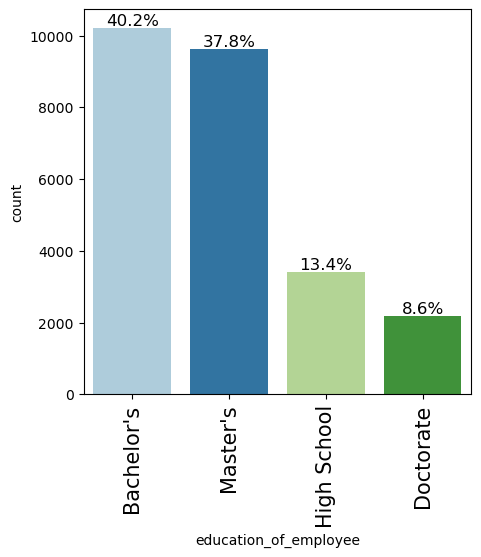

In [12]:
labeled_barplot(data_cleaned, 'education_of_employee', perc=True, n=None)  

**education_of_employee**
- Most applicants about 90% have some form of higher education degree 
- There are more bachelor's 40% degree holders than Masters at 37.8
- Least number of applicants have Doctorate

#### Observations on region of employment

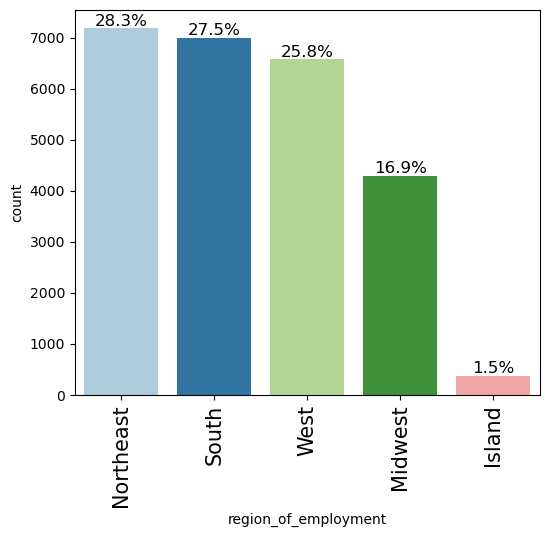

In [13]:
labeled_barplot(data_cleaned, 'region_of_employment', perc=True, n=None)  


**region_of_employment**
- Applicants are almost evenly distributed between Northeast,south and west.
- Regions Midwest and island had lower applicants compared to other regions.
- About 1.5% of the applicants are from the island region
- Northeast,south and west are more prefered regions by the applicants 


#### Observations on job experience

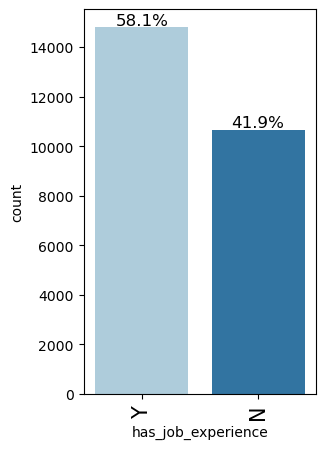

In [14]:
labeled_barplot(data_cleaned, 'has_job_experience', perc=True, n=None)  


**has_job_experience**
- More than half about 58% of the applicats are experienced
- about 41% applicants have no job experience

#### Observations on case status

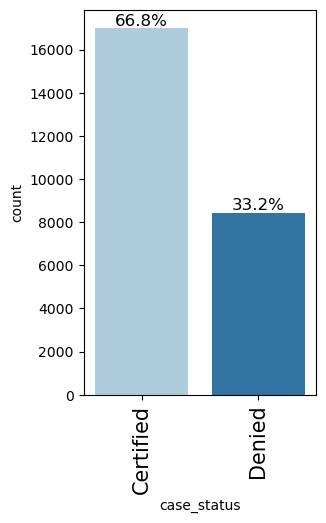

In [15]:
labeled_barplot(data_cleaned, 'case_status', perc=True, n=None)  

**case_status**
- case status is the dependent variable 
- about 67% of the applicants were certified

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [16]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

# started with this code and it was harder to read the output, left the code here to illustrate looping was attempted 

# target_col = 'case_status'
# for col in data_cleaned.columns:
#     if data_cleaned[col].dtype in ['int64', 'float64']:
#         print(f"Distribution of numerical column: {col} w.r.t target column: {target_col}")
#         distribution_plot_wrt_target(data_cleaned, col, target_col)  # distribution wrt target  



In [17]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


# started with this code and it was harder to read the output, left the code here to illustrate looping was attempted 
# target_col = 'case_status'
# for col in data_cleaned.columns:
#     if data_cleaned[col].dtype == 'object':
#         print(f"Stacked barplot of categorical column: {col} w.r.t target column: {target_col}")
#         stacked_barplot(data_cleaned, col, target_col)  # stacked barplot wrt target

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


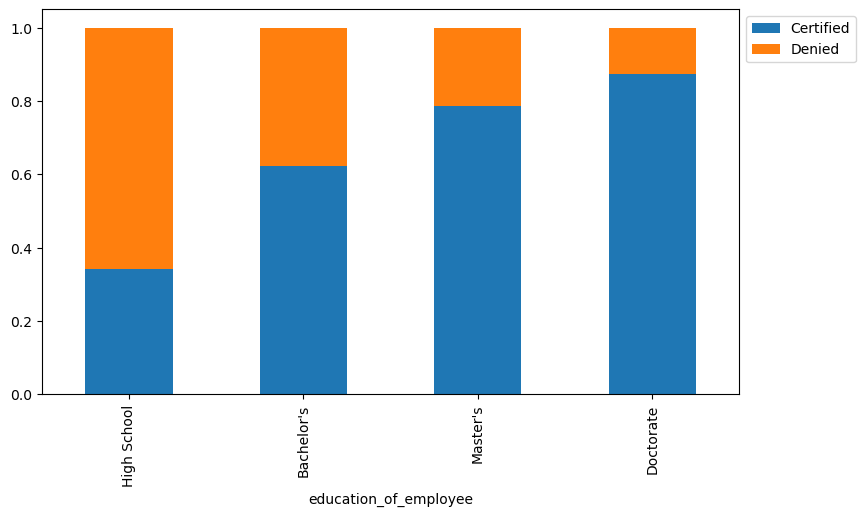

In [18]:
stacked_barplot(data_cleaned, 'education_of_employee', 'case_status')


**education_of_employee**
- **YES Higher education increases the certification chances** 
- Higher education Levels like Doctorate and Masters have higher certification rates compared to lower education levels like Bachelors and High School
- Doctorate certification is almost 50% higher than High School


#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


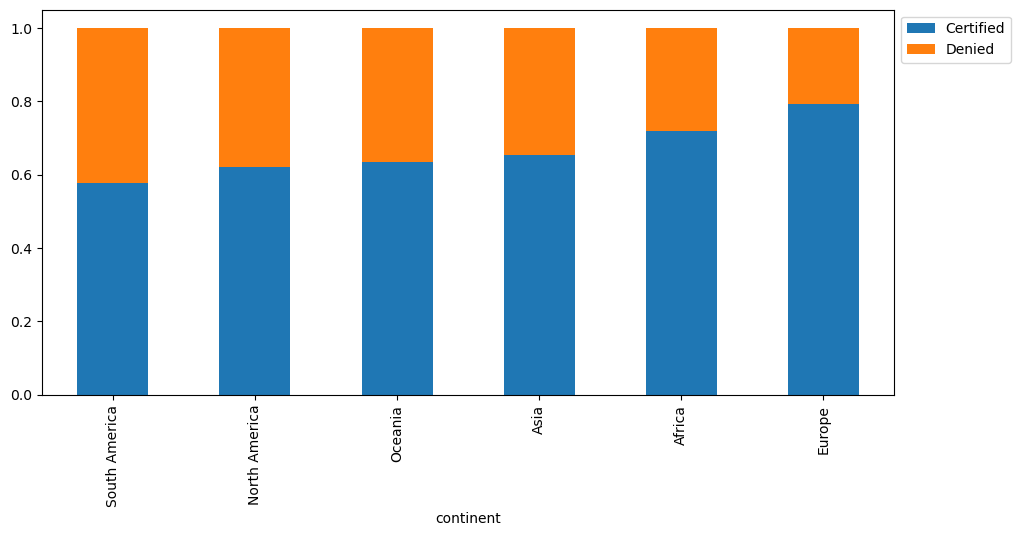

In [19]:
stacked_barplot(data_cleaned, 'continent', 'case_status')


**continent**
- Europe has the highest rate of approval total applicants 3727, 2953 got approved which is about 79% **approval rate**
- Africa has 550 applicants and 396 got approved which has **approval rate** 72%
- Asia has the highest number of applicants 16840 and third highest **approval rate** which is little over 60%

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


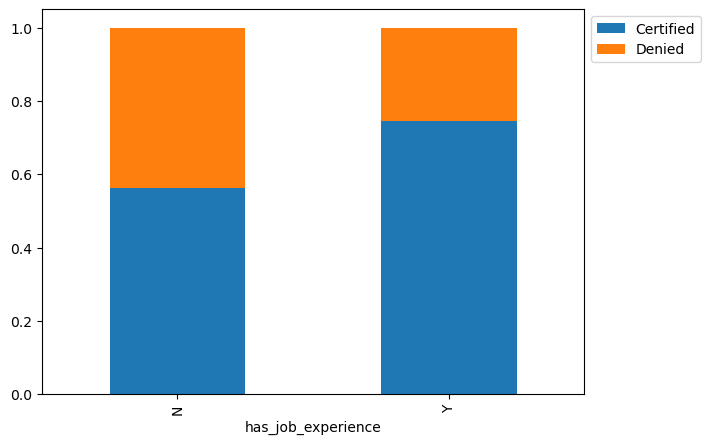

In [20]:
stacked_barplot(data_cleaned, 'has_job_experience', 'case_status')



**has_job_experience**
- **Yes**, having prior job experience has a higher rate of certification about 70% 
- without experience certification is about 60%

#### Is the prevailing wage consistent across all regions of the US?

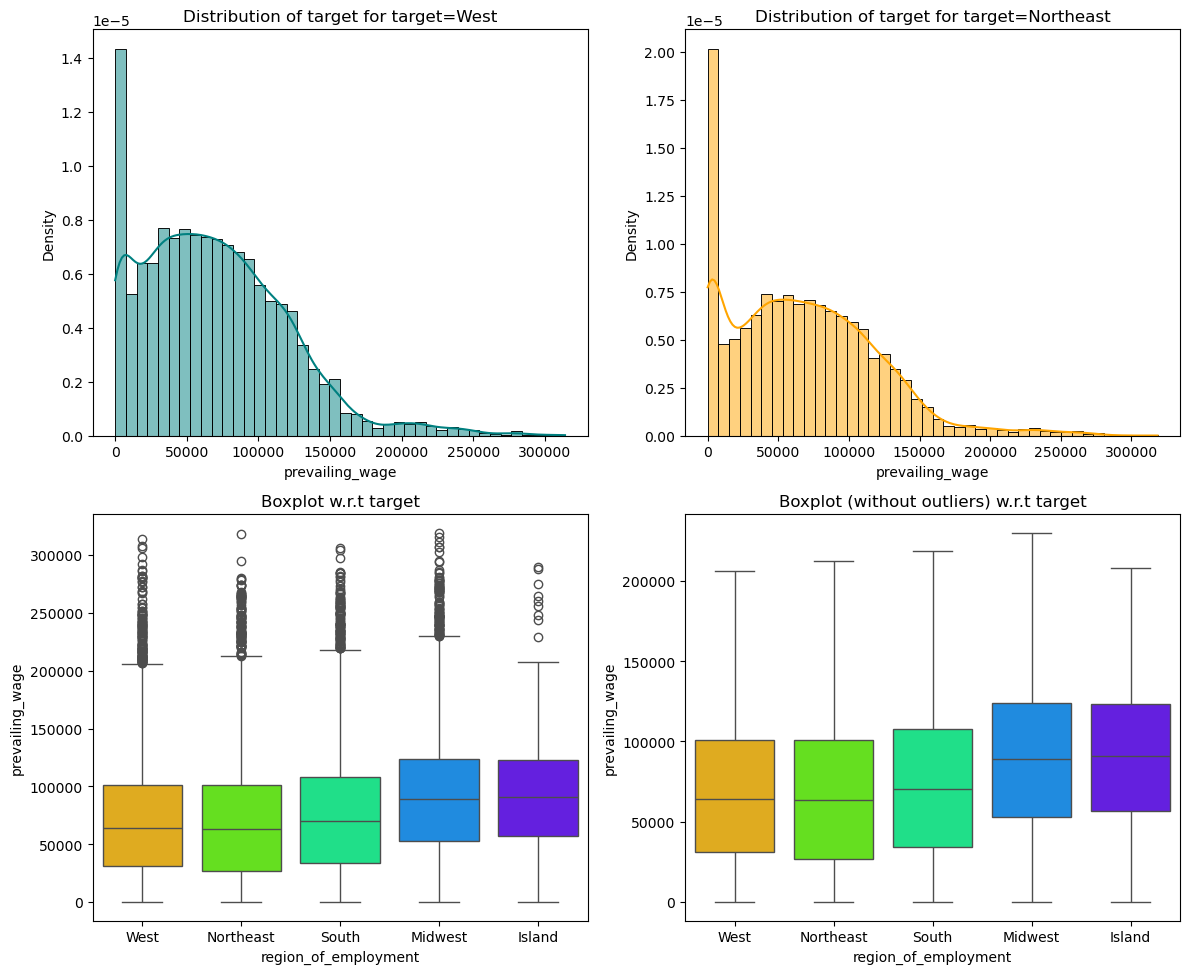

In [21]:
distribution_plot_wrt_target(data_cleaned, 'prevailing_wage', 'region_of_employment')

**is prevailing_wages consistent accross all regions?**
- **NO** prevailing wages is not consistent accross regions, the median value is much higher for midwest and Island when compared to west, Northeast and South 

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

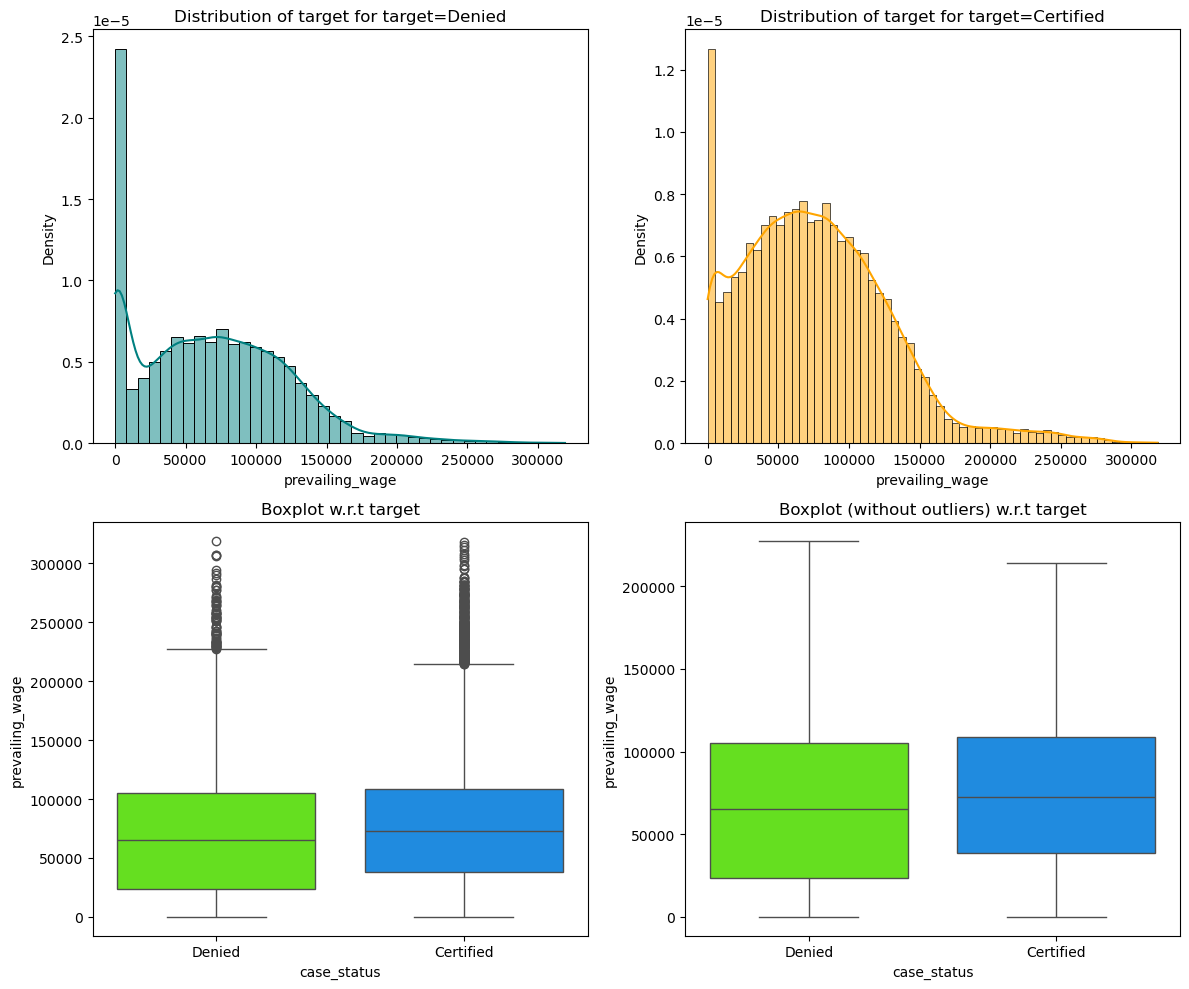

In [22]:
distribution_plot_wrt_target(data_cleaned, 'prevailing_wage', 'case_status')

**Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?**
- visa status is almost evenly distributed with changes in prevailing wages
- both certified and denied have large number of prevailing wage ouliers and the outliers are in the same wage range, this supports the previos observation

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


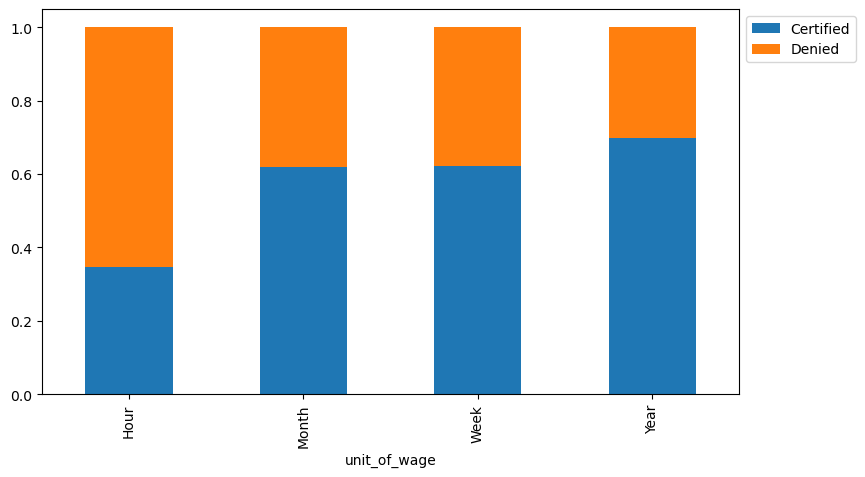

In [23]:
stacked_barplot(data_cleaned, 'unit_of_wage', 'case_status')


- Hourly wages are less likely to get certified compared to monthly , weekly and annualy wages
- month, week and year uint of wage have real close certification rate

## Data Pre-processing

**Pre-Processing - usual steps**
- Missing values - complete (this check was complete in previous steps)
- oulier treatment - 
- remove invalid data - like negative employee count - Complete
- univariate and bivariate analysis - complete
- remove duplicate data 


### Outlier Check

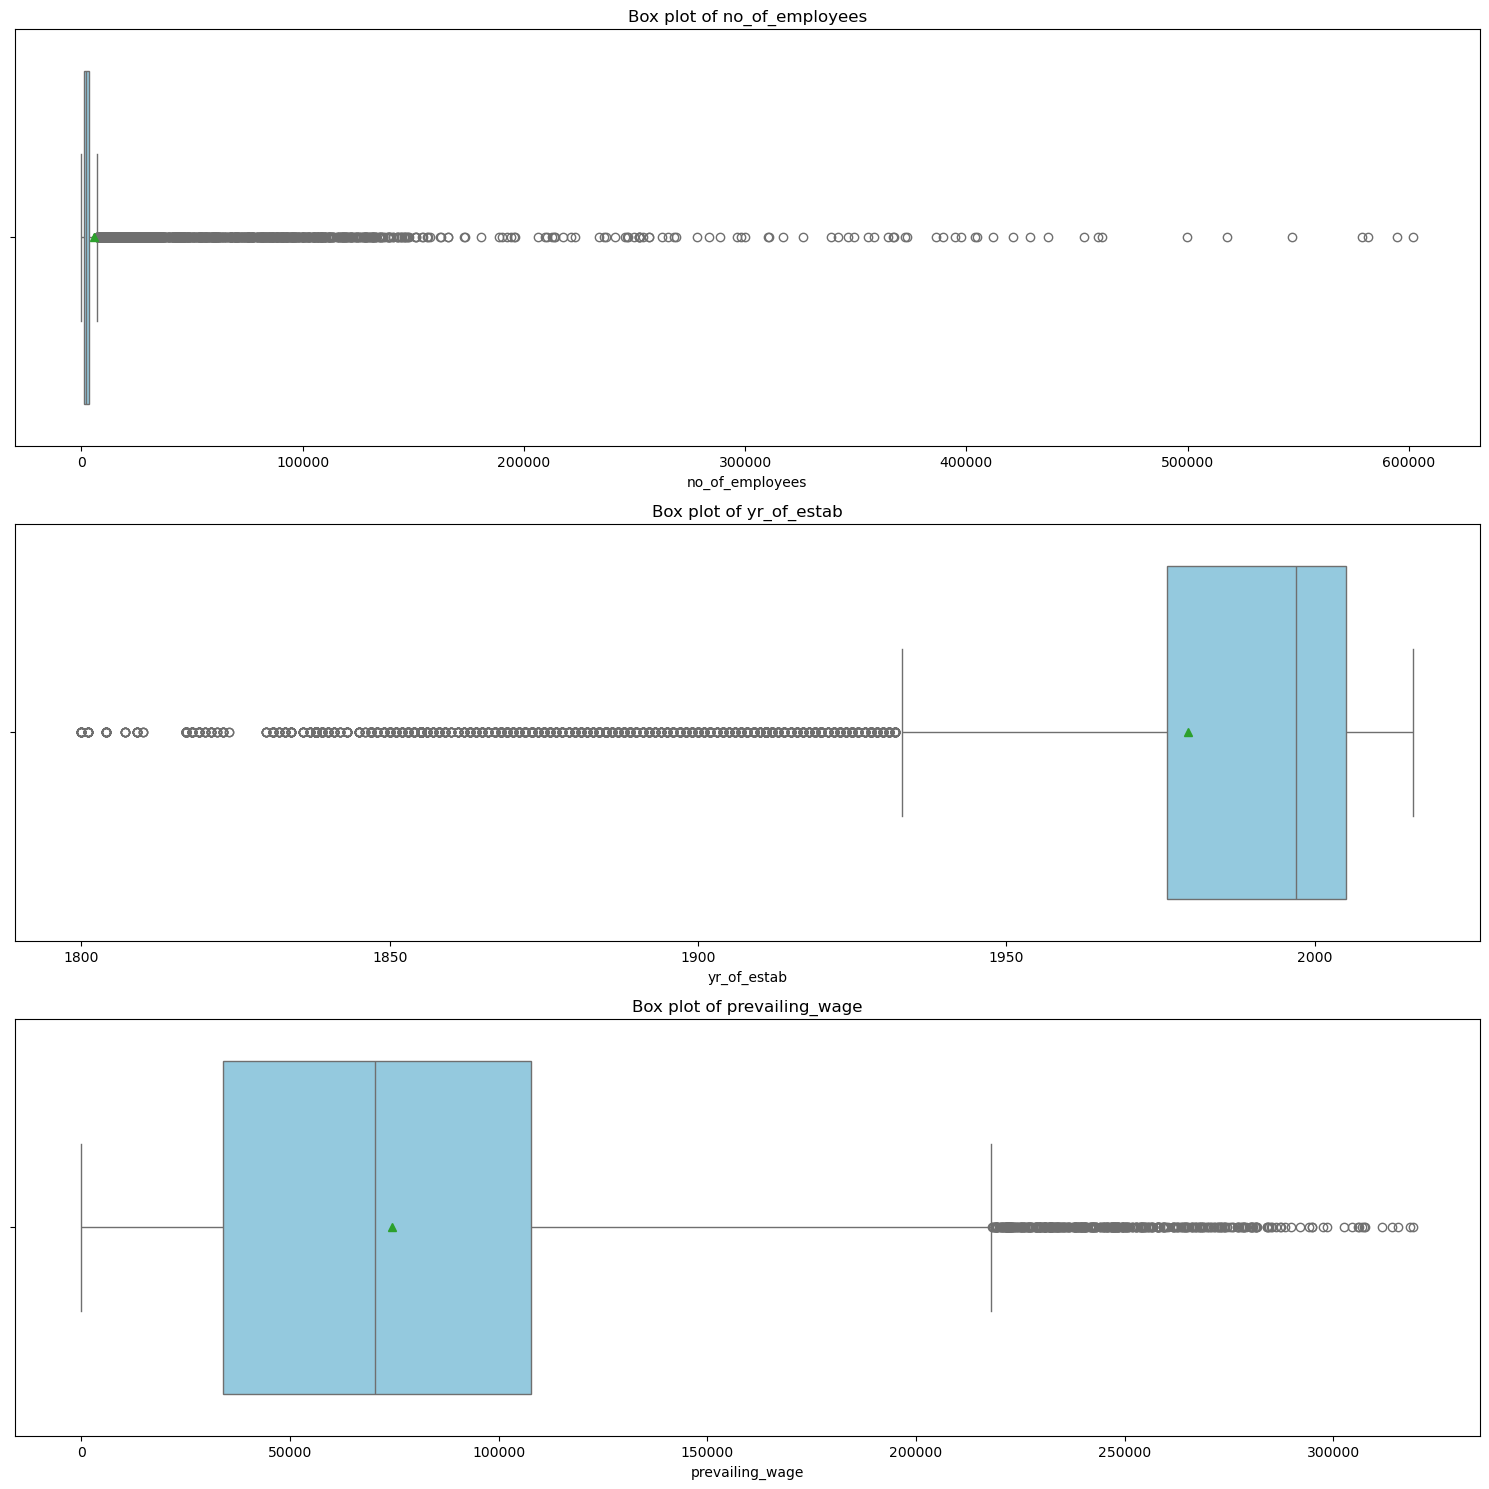

In [24]:
# Box plots for all numerical columns in data_cleaned
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 5 * len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=data_cleaned[col], color="skyblue", showmeans=True)
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

**outliers** - no outlier data has been removed, due to large number of outlier, the can be valid data
- no_of_employees has a large number for outliers, the outliers can be valid data points 
- yr_of_estab has a large number for outliers, the outliers can be valid data points 
- prevailing_wage has a large number for outliers, the outliers can be valid data points 

# check for  duplicates

In [25]:
#check for duplicates 
duplicate_rows = data_cleaned.duplicated()
num_duplicate_rows = duplicate_rows.sum()
if num_duplicate_rows > 0:
    print(f"Number of duplicate rows: {num_duplicate_rows}")
    print("Duplicate rows found:")
    print(data_cleaned[duplicate_rows])
    print("Removing duplicate rows.")
    data_cleaned = data_cleaned.drop_duplicates()
    print(f"New shape of the dataset after removing duplicates: {data_cleaned.shape}")
else:
    print("No duplicate rows found.")

No duplicate rows found.


- Dataset does not have duplicates

### Data Preparation for modeling

**Steps**
- remove unique column "case_id", it has been established in the previous steps, that the case_id us unique and is not useful
- define target varible and do the conversion 
- split data as needed 
- categorical variable transformation 

In [26]:
#Remove unique column "case_id"
data_cleaned = data_cleaned.drop(columns=["case_id"], axis=1)
print("Shape of the dataset after removing 'case_id':", data_cleaned.shape)
print("Columns in the dataset after removing 'case_id':", data_cleaned.columns.tolist())

Shape of the dataset after removing 'case_id': (25447, 11)
Columns in the dataset after removing 'case_id': ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'yr_of_estab', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status']


In [27]:
# target variable case_status conversion
# create a new column 'target' with 1 for 'Certified' and 0 for 'Denied'
# convert target variable to integer type
# drop column 'case_status'

data_cleaned['target'] = data_cleaned['case_status'].map({'Certified': 1, 'Denied': 0})
data_cleaned['target'] = data_cleaned['target'].astype(int)
data_cleaned.drop(columns=['case_status'], axis=1, inplace=True)  # drop original case_status column
data_cleaned.head()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,target
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


**Split the Data**
- three sets of data aee needed 
    - Test, train and validation
- step1: split data temp (80%), test(20%)
- step2: split temp data into train (80%) and validation(20%)

In [28]:
#X - features, y - target variable
X=data_cleaned.drop(columns=['target'], axis=1)  # features
y=data_cleaned['target']  # target variable

#step1
# split data into temp (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#step2
# further split temp data into train (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)  
# stratify=y_temp to maintain the same proportion of classes in train and validation sets

print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of validation data:", X_val.shape, y_val.shape) 
print("Shape of test data:", X_test.shape, y_test.shape)   



Shape of training data: (16285, 10) (16285,)
Shape of validation data: (4072, 10) (4072,)
Shape of test data: (5090, 10) (5090,)


**categorical variable transformation**
- Step1 X_train transform categorical columns, get_dummies
- Step2 X_test transform categorical columns, get_dummies
- Step3 X_val transform categorical columns, get_dummies


In [29]:
# categorical variable transformation

#step1 X_train transform categorical columns, get_dummies
X_train = pd.get_dummies(X_train, drop_first=True)

#step2 X_val transform categorical columns, get_dummies
X_val = pd.get_dummies(X_val, drop_first=True)

#step3 X_test transform categorical columns, get_dummies
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of validation and test sets to match the training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0) 

# Display the first few rows of the transformed datasets
print(X_train.head())
print(X_val.head())
print(X_test.head())    



       no_of_employees  yr_of_estab  prevailing_wage  continent_Asia  \
19552              459         1985        124893.09            True   
6963              1773         2006         81611.89           False   
23746             4487         1977         10320.92           False   
21885             1511         2007        133647.88            True   
13078              207         2001         63686.32            True   

       continent_Europe  continent_North America  continent_Oceania  \
19552             False                    False              False   
6963               True                    False              False   
23746             False                     True              False   
21885             False                    False              False   
13078             False                    False              False   

       continent_South America  education_of_employee_Doctorate  \
19552                    False                            False   
6963  

## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

**Requirement: The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval.**
- To meet this requirement, the model needs perform well on 
    - predicting true positivies
    - The **metric precison** focuses on models perfromace identifing True positives , is suitable for this requirement 
    - Accuracy and F1 score is also helpful 

**Rationale to use precision**
- The requirement focuses on identifinig candiateds with higher chanes of validation, this implies higher TruePositives , **precision** helps to understand the ration of True positive to total predictive positives
- higher precision also implies low false positive 

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [30]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [31]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**Requirement: The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval.**
- To meet this requirement, the model needs perform well on 
    - predicting true positivies
    - The **metric precison** focuses on models perfromace identifing True positives , is suitable for this requirement
    - Accuracy and F1 score is also helpful 


**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [36]:
#list of models to be built and evaluated
models_ls = []
models_ls = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    ("Bagging Classifier", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'), random_state=42 )),
    ("Random Forest", RandomForestClassifier(random_state=42, class_weight='balanced')),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier( random_state=42)),
] 

for name, model in models_ls:
    print(f"Model: {name}")
    cr_validation = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
    print(f"Cross-validation precision scores for {name}: {cr_validation} with mean {cr_validation.mean()} and std {cr_validation.std()}")
    
    # fit the model on training data
    model.fit(X_train, y_train)  # fit the model on training data
    
    #model performance on training data 
    train_precision = precision_score(y_train, model.predict(X_train))
    print(f"Training set precision for {name}: {train_precision}")
    
    #model performance on validation data
    validation_precision = precision_score(y_val, model.predict(X_val))
    print(f"Validation set precision for {name}: {validation_precision}")
    
    #model performance on test data
    test_precision = precision_score(y_test, model.predict(X_test))
    print(f"Test set precision for {name}: {test_precision}")
    diff_train_val = abs(train_precision - validation_precision)
    diff_val_test = abs(validation_precision - test_precision)
    print(f"Difference in precision between training and validation sets for {name}: {diff_train_val}")
    print(f"Difference in precision between validation and test sets for {name}: {diff_val_test}")
    print("\n\n")
    


Model: Decision Tree
Cross-validation precision scores for Decision Tree: [0.7299908  0.73812817 0.75089928 0.7460173  0.72966833] with mean 0.7389407758992441 and std 0.00848320188781283
Training set precision for Decision Tree: 1.0
Validation set precision for Decision Tree: 0.7324656543745481
Test set precision for Decision Tree: 0.7452394691286786
Difference in precision between training and validation sets for Decision Tree: 0.26753434562545186
Difference in precision between validation and test sets for Decision Tree: 0.01277381475413042



Model: Bagging Classifier
Cross-validation precision scores for Bagging Classifier: [0.75969342 0.76414234 0.77142857 0.77131072 0.76470588] with mean 0.7662561862294994 and std 0.004522027447316505
Training set precision for Bagging Classifier: 0.9904911373707533
Validation set precision for Bagging Classifier: 0.7680430879712747
Test set precision for Bagging Classifier: 0.7694508009153318
Difference in precision between training and validat

**Original Data**
**Least difference in precision between training and validation data are the best performing models**
- Based on the results
- **1st choice Gradient Boosting with differnce 0.0005**
- 2nd choice AdaBoost with difference 0.002

### Model Building with Oversampled data

In [41]:
#training data target variable distribution before oversampling
print("Training data target variable distribution before oversampling:")
print(y_train.value_counts())
print ("\n\n")  

# oversampling using SMOTE on training data only
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# training data target variable distribution after oversampling
print("Training data target variable distribution after oversampling:")
print(y_train_oversampled.value_counts())
print ("\n\n")  

# evaluate models on resampled training data
for name, model in models_ls:
    print(f"Model: {name}")
    cr_validation = cross_val_score(model, X_train_oversampled, y_train_oversampled, cv=5, scoring='precision')
    print(f"Cross-validation precision scores for {name}: {cr_validation} with mean {cr_validation.mean()} and std {cr_validation.std()}")

    # fit the model on training data
    model.fit(X_train_oversampled, y_train_oversampled)

    # model performance on training data
    train_precision = precision_score(y_train_oversampled, model.predict(X_train_oversampled))
    print(f"Training set precision for {name}: {train_precision}")

    # model performance on validation data
    validation_precision = precision_score(y_val, model.predict(X_val))
    print(f"Validation set precision for {name}: {validation_precision}")

    # model performance on test data
    test_precision = precision_score(y_test, model.predict(X_test))
    print(f"Test set precision for {name}: {test_precision}")

    diff_train_val = abs(train_precision - validation_precision)
    diff_val_test = abs(validation_precision - test_precision)
    print(f"Difference in precision between training and validation sets for {name}: {diff_train_val}")
    print(f"Difference in precision between validation and test sets for {name}: {diff_val_test}")
    print("\n\n")



Training data target variable distribution before oversampling:
target
1    10880
0     5405
Name: count, dtype: int64



Training data target variable distribution after oversampling:
target
1    10880
0    10880
Name: count, dtype: int64



Model: Decision Tree
Cross-validation precision scores for Decision Tree: [0.58652813 0.59552992 0.73496762 0.91965389 0.91388401] with mean 0.7501127140218606 and std 0.14591119162461225
Training set precision for Decision Tree: 1.0
Validation set precision for Decision Tree: 0.7444187836797537
Test set precision for Decision Tree: 0.7457932692307693
Difference in precision between training and validation sets for Decision Tree: 0.25558121632024633
Difference in precision between validation and test sets for Decision Tree: 0.0013744855510156029



Model: Bagging Classifier
Cross-validation precision scores for Bagging Classifier: [0.62158221 0.6287796  0.76034959 0.95015576 0.94854309] with mean 0.7818820490405054 and std 0.14539050197677247
Trai

**Oversampled Data**
**Least difference in precision between training and validation data are the best performing models**
- Based on the results
- **1st choice Gradient Boosting with differnce 0.02**
- 2nd choice AdaBoost with difference 0.03

### Model Building with Undersampled data

In [40]:
#training data target variable distribution before undersampling
print("Training data target variable distribution before undersampling:")
print(y_train.value_counts())
print ("\n\n") 

# undersampling using RandomUnderSampler on training data only
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# training data target variable distribution after undersampling
print("Training data target variable distribution after undersampling:")
print(y_train_resampled.value_counts())
print ("\n\n") 

# evaluate models on resampled training data
for name, model in models_ls:
    print(f"Model: {name}")
    cr_validation = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='precision')
    print(f"Cross-validation precision scores for {name}: {cr_validation} with mean {cr_validation.mean()} and std {cr_validation.std()}")

    # fit the model on training data
    model.fit(X_train_resampled, y_train_resampled)

    # model performance on training data
    train_precision = precision_score(y_train_resampled, model.predict(X_train_resampled))
    print(f"Training set precision for {name}: {train_precision}")

    # model performance on validation data
    validation_precision = precision_score(y_val, model.predict(X_val))
    print(f"Validation set precision for {name}: {validation_precision}")

    # model performance on test data
    test_precision = precision_score(y_test, model.predict(X_test))
    print(f"Test set precision for {name}: {test_precision}")

    diff_train_val = abs(train_precision - validation_precision)
    diff_val_test = abs(validation_precision - test_precision)
    print(f"Difference in precision between training and validation sets for {name}: {diff_train_val}")
    print(f"Difference in precision between validation and test sets for {name}: {diff_val_test}")
    print("\n\n")



Training data target variable distribution before undersampling:
target
1    10880
0     5405
Name: count, dtype: int64



Training data target variable distribution after undersampling:
target
0    5405
1    5405
Name: count, dtype: int64



Model: Decision Tree
Cross-validation precision scores for Decision Tree: [0.61874431 0.61427281 0.62723005 0.63653484 0.63917526] with mean 0.6271914534023151 and std 0.009686665795304576
Training set precision for Decision Tree: 1.0
Validation set precision for Decision Tree: 0.7656178750569995
Test set precision for Decision Tree: 0.7740754302453314
Difference in precision between training and validation sets for Decision Tree: 0.23438212494300048
Difference in precision between validation and test sets for Decision Tree: 0.008457555188331911



Model: Bagging Classifier
Cross-validation precision scores for Bagging Classifier: [0.65705458 0.68507157 0.68120805 0.69181722 0.68253968] with mean 0.6795382219010513 and std 0.011821191214685388
Tra

**UnderSampled Data**
**Least difference in precision between training and validation data are the best performing models**
- Based on the results
- **1st choice XGBoosting with differnce 0.05**
- 2nd choice Gradinent Boosting with difference 0.10

# These are the top three best performing models

**Least difference in precision between training and validation data**

- **1st choice Original Data    - Gradient Boosting with differnce 0.0005**
- **2nd choice Original Data    - AdaBoost with difference 0.002**
- **3rd choice Oversampled Data - Gradient Boosting with differnce 0.02**



## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

In [43]:
# **1st choice Original Data    - Gradient Boosting with differnce 0.0005**
# - **2nd choice Original Data    - AdaBoost with difference 0.002**
# - **3rd choice Oversampled Data - Gradient Boosting with differnce 0.02**


scorer = metrics.make_scorer(precision_score)   


#model tuning Gradient Boosting Classifier using original data
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

print ("Gradient Boosting - original data tuning results")
print("Best parameters found: ", grid_search.best_params_)
gb_tuned = grid_search.best_estimator_
gb_tuned.fit(X_train, y_train)
print("Gradient Boosting - original data performance on test data")
print("Precision: ", precision_score(y_test, gb_tuned.predict(X_test)))
print("Recall: ", recall_score(y_test, gb_tuned.predict(X_test)))
print("F1 Score: ", f1_score(y_test, gb_tuned.predict(X_test)))
print("\n\n")


#model tuning AdaBoost Classifier using original data
param_grid = {
    'n_estimators': [50, 75, 85, 100],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)
print ("AdaBoost - original data tuning results")
print("Best parameters found: ", grid_search.best_params_)
ada_tuned = grid_search.best_estimator_
ada_tuned.fit(X_train, y_train)
print("AdaBoost - original data performance on test data")
print("Precision: ", precision_score(y_test, ada_tuned.predict(X_test)))
print("Recall: ", recall_score(y_test, ada_tuned.predict(X_test)))
print("F1 Score: ", f1_score(y_test, ada_tuned.predict(X_test)))
print("\n\n")

#model tuning Gradient Boosting Classifier using oversampled data
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train_oversampled, y_train_oversampled)

print("Gradient Boosting - oversampled data tuning results")
print("Best parameters found: ", grid_search.best_params_)
gb_tuned = grid_search.best_estimator_
gb_tuned.fit(X_train_oversampled, y_train_oversampled)
print("Gradient Boosting - oversampled data performance on test data")
print("Precision: ", precision_score(y_test, gb_tuned.predict(X_test)))
print("Recall: ", recall_score(y_test, gb_tuned.predict(X_test)))
print("F1 Score: ", f1_score(y_test, gb_tuned.predict(X_test)))
print("\n\n")


Gradient Boosting - original data tuning results
Best parameters found:  {'learning_rate': 0.2, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 0.9}
Gradient Boosting - original data performance on test data
Precision:  0.7778067205001302
Recall:  0.8779770655689503
F1 Score:  0.8248618784530387



AdaBoost - original data tuning results
Best parameters found:  {'learning_rate': 0.2, 'n_estimators': 85}
AdaBoost - original data performance on test data
Precision:  0.7637141419224962
Recall:  0.8923845927668332
F1 Score:  0.8230508474576271



Gradient Boosting - oversampled data tuning results
Best parameters found:  {'learning_rate': 0.2, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 0.7}
Gradient Boosting - oversampled data performance on test data
Precision:  0.7793489861259338
Recall:  0.8588650396942076
F1 Score:  0.8171772275842776





## Model Performance Summary and Final Model Selection

In [ ]:
#compare model performance of tuned models on test data
print("Comparing model performance of tuned models on test data:\n")

models = {
    "Gradient Boosting - Original Data": gb_tuned,
    "AdaBoost - Original Data": ada_tuned,
    "Gradient Boosting - Oversampled Data": gb_tuned
}

for name, model in models.items():
    print(f"Model: {name}")
    print("Precision: ", precision_score(y_test, model.predict(X_test)))
    print("Recall: ", recall_score(y_test, model.predict(X_test)))
    print("F1 Score: ", f1_score(y_test, model.predict(X_test)))
    print("\n\n")





Comparing model performance of tuned models on test data:

Model: Gradient Boosting - Original Data
Precision:  0.7793489861259338
Recall:  0.8588650396942076
F1 Score:  0.8171772275842776



Model: AdaBoost - Original Data
Precision:  0.7637141419224962
Recall:  0.8923845927668332
F1 Score:  0.8230508474576271



Model: Gradient Boosting - Oversampled Data
Precision:  0.7793489861259338
Recall:  0.8588650396942076
F1 Score:  0.8171772275842776





# Model Performance

# AdaBoost is the selected model
- Precision score is slightly .01 lower than Gradient Boosting
- Recall score is slightly higher .04 higher than Gradient Boosting, which shows model performs well in identifiing True positives
- F1 score is slightly higher .01 higher than Gradient Boosting, which shows model overall performs well
- Since the Recall score is better than Gradient boosting, this model is expected to meet the requirements 

**Requirement: The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval.**

# Features used in the AdaBoosting


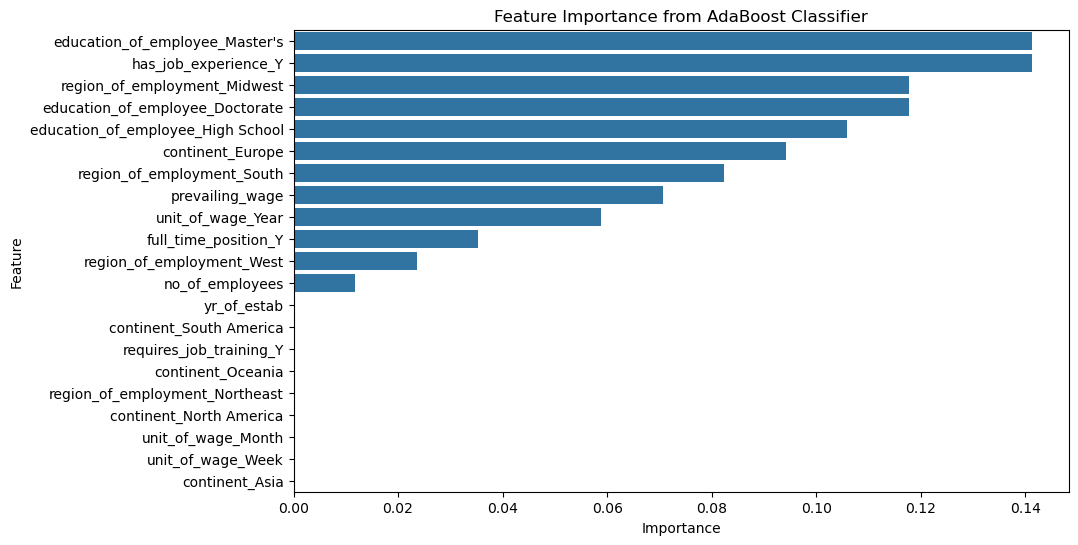

In [47]:
# Feature importance from the best model - Ada Boosting on original data
feature_importances = ada_tuned.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False) 
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from AdaBoost Classifier')
plt.show()

## Actionable Insights and Recommendations

# Actionable Insights

## Features
1. Applicants with Masters degree are most likely to get the Visa certified, about 80% of the applicants got approved
2. Applicants with prior job experience are most likely to get the visa certified, about 80% of the applicants got approved
3. Midwest has about 17% applicants, and they are most likely to get approved

# Model selection
1. oversampling and undersampling of data had no significant impact

# Data 
1. total data 25480 rows 
2. there were some bad data like companies with negative employee count
3. two century old companies are still functioning and have applicants
4. there are more newer companies about 50 years old compared to older companies
5. Northeast, south and west are regions of empoyment is more preferred
6. Applicants from europe had most visa approval percentage
7. Master and doctorates with job experience had the most visa approvals


# Recommendations
1. Adaptive Boosting Model is the recommended model
2. Applicants with Masters degree and job experience as most likely get the visa approved
3. Optimize resource usage, better service by 
    - streamlining the process (quick approval) for  applicants most likely to get visa approved ( see recomendation 2 )
    - normal process for applicants most likely to get rejected
4. Model: data changes over time, newer patterns emerge, review the model, perform similar exercise and determine the suitable model
5. Model review is recomended for 20 to 30 % data increase


<font size=6 color='blue'>Power Ahead</font>
___